## **Bibliotecas**

In [ ]:
!pip install ebooklib

In [ ]:
!python -m spacy download pt_core_news_lg

In [ ]:
!qpip install python-louvain

In [4]:
from IPython import get_ipython
from IPython.display import display
from google.colab import files
from nltk import sent_tokenize
from collections import Counter
import community.community_louvain as community_louvain
import re
import spacy
import os
import nltk
import networkx as nx
import matplotlib.pyplot as plt
import community as community_louvain

# Upload dos livros

In [5]:
#Fazer o upload dos livros para o Colab
uploaded = files.upload()

Saving Depois_StephenKing.txt to Depois_StephenKing.txt
Saving Joyland_StephenKing.txt to Joyland_StephenKing.txt


# Avaliação dos livros


## Joyland

In [6]:
#Abrindo o primeiro livro e exibindo com numeração de linhas
with open('Joyland_StephenKing.txt', 'rt') as file:
    for i, line in enumerate(file):
        print(f"{i+1}: {line}", end="") #end="" prevents extra newline

1: Copyright © 2013 by Stephen King
2: 
3: Publicado mediante acordo com o autor através da The Lotts Agency, LTD.
4: 
5: Grafia atualizada segundo o Acordo Ortográfico da Língua Portuguesa
6: 
7: de 1990, que entrou em vigor no Brasil em 2009.
8: 
9: Todos os direitos desta edição reservados à
10: 
11: EDITORA OBJETIVA LTDA.
12: 
13: Rua Cosme Velho, 103
14: 
15: Rio de Janeiro – RJ – CEP: 22241-090
16: 
17: Tel.: (21) 2199-7824 – Fax: (21) 2199-7825
18: 
19: www.objetiva.com.br
20: 
21: Título original
22: 
23: Joyland
24: 
25: Imagem da capa
26: 
27: Arte de capa original © 2013 by Glen Orbik, ilustrada para a Hard Case Crime
28: 
29: Adaptação de capa
30: 
31: Julio Moreira
32: 
33: Revisão
34: 
35: Flora Pinheiro
36: 
37: Juliana Souza
38: 
39: Sabrina Primo
40: 
41: Coordenação de e-book
42: 
43: Marcelo Xavier
44: 
45: Conversão para e-book
46: 
47: Abreu’s System Ltda.
48: 
49: CIP-BRASIL. CATALOGAÇÃO-NA-FONTE
50: 
51: SINDICATO NACIONAL DOS EDITORES DE LIVROS, RJ
52: 
53: B64j

## Depois

In [7]:
#Abrindo o primeiro livro e exibindo com numeração de linhas
with open('Depois_StephenKing.txt', 'rt') as file:
    for i, line in enumerate(file):
        print(f"{i+1}: {line}", end="") #end="" prevents extra newline

1: Sumário
2: 
3: 
4: Capa
5: 
6: Folha de rosto
7: 
8: Sumário
9: 
10: Dedicatória
11: 
12: Epígrafe
13: 
14: Prefácio
15: 
16: 1
17: 
18: 2
19: 
20: 3
21: 
22: 4
23: 
24: 5
25: 
26: 6
27: 
28: 7
29: 
30: 8
31: 
32: 9
33: 
34: 10
35: 
36: 11
37: 
38: 12
39: 
40: 13
41: 
42: 14
43: 
44: 15
45: 
46: 16
47: 
48: 17
49: 
50: 18
51: 
52: 19
53: 
54: 20
55: 
56: 21
57: 
58: 22
59: 
60: 23
61: 
62: 24
63: 
64: 25
65: 
66: 26
67: 
68: 27
69: 
70: 28
71: 
72: 29
73: 
74: 30
75: 
76: 31
77: 
78: 32
79: 
80: 33
81: 
82: 34
83: 
84: 35
85: 
86: 36
87: 
88: 37
89: 
90: 38
91: 
92: 39
93: 
94: 40
95: 
96: 41
97: 
98: 42
99: 
100: 43
101: 
102: 44
103: 
104: 45
105: 
106: 46
107: 
108: 47
109: 
110: 48
111: 
112: 49
113: 
114: 50
115: 
116: 51
117: 
118: 52
119: 
120: 53
121: 
122: 54
123: 
124: 55
125: 
126: 56
127: 
128: 57
129: 
130: 58
131: 
132: 59
133: 
134: 60
135: 
136: 61
137: 
138: 62
139: 
140: 63
141: 
142: 64
143: 
144: 65
145: 
146: 66
147: 
148: 67
149: 
150: 68
151: 
152: 69
153: 
15

# Limpeza dos Dados:

In [8]:
# Carregar o texto do primeiro livro
Livro1 = 'Joyland_StephenKing.txt'
file = open(Livro1, 'rt', encoding='utf-8')  # Adicionado encoding para evitar problemas com caracteres especiais
text1 = file.read()
file.close()

# Carregar o texto do segundo livro
Livro2 = 'Depois_StephenKing.txt'
file = open(Livro2, 'rt', encoding='utf-8')
text2 = file.read()
file.close()

In [9]:
# Para o Livro 1 (Joyland)
!sed -i '6043,6055d' Joyland_StephenKing.txt  # Remove linhas 6043 a 6055 (rodapé)

# Para o Livro 2 (Depois)
!sed -i '4676,4902d' Depois_StephenKing.txt  # Remove linhas 4500 a 4550 (rodapé)

In [10]:
# Para o Livro 1 (Joyland)
!sed -i '1,105d' Joyland_StephenKing.txt  # Remove linhas 1 a 105 (cabeçalho)

# Para o Livro 2 (Depois)
!sed -i '1,175d' Depois_StephenKing.txt  # Remove linhas 1 a 175 (cabeçalho)

In [11]:
# Função para limpar o texto
def clean_text(file_path, output_path):
    with open(file_path, 'rt', encoding='utf-8') as file:
        lines = file.readlines()

    cleaned_lines = []
    for line in lines:
        # Remover linhas vazias ou apenas com espaços
        if not line.strip():
            continue

        # Normalizar espaços e pontuação
        line = line.strip()  # Remove espaços extras no início e fim
        line = " ".join(line.split())  # Remove espaços múltiplos entre palavras
        line = line.replace(" ,", ",").replace(" .", ".")  # Corrigir vírgulas e pontos
        line = line.replace(" ?", "?").replace(" !", "!")  # Corrigir interrogação/exclamação

        # Transformar em minúsculas (opcional, dependendo da análise futura)
        line = line.lower()

        cleaned_lines.append(line)

    # Salvar o texto limpo em um novo arquivo
    with open(output_path, 'w', encoding='utf-8') as output_file:
        output_file.write("\n".join(cleaned_lines))
    print(f"Texto limpo salvo em: {output_path}")

# Caminhos dos arquivos
Livro1 = 'Joyland_StephenKing.txt'
Livro2 = 'Depois_StephenKing.txt'

# Aplicar limpeza nos livros e salvar em novos arquivos
clean_text(Livro1, 'Joyland_cleaned.txt')
clean_text(Livro2, 'Depois_cleaned.txt')

Texto limpo salvo em: Joyland_cleaned.txt
Texto limpo salvo em: Depois_cleaned.txt


# Análise de PoS Tagging e NER

## Identificando categorias gramaticais (PoS) e entidades nomeadas (NER).

### *Joyland*

In [12]:
# Carregar modelo de linguagem em português (versão maior)
nlp = spacy.load("pt_core_news_lg")

# Carregar o arquivo limpo.txt
with open('Joyland_cleaned.txt', 'r', encoding='utf-8') as file:
    text = file.read()

# Limpeza adicional dos textos (remoção de espaços extras)
joyland_cleaned = ' '.join(text.split())  # Limpeza do texto

# Processando o texto limpo
doc1 = nlp(joyland_cleaned)

# Exibindo todos os tokens no texto (sem segmentação de sentenças)
print("Tokens do texto:")
for token in doc1:
    print(f"{token.text}: {token.tag_}")  # Token e sua tag PoS


A saída de streaming foi truncada nas últimas 5000 linhas.
o: DET
falecido: NOUN
(: PUNCT
pelo: ADP
menos: NOUN
era: AUX
o: PRON
que: PRON
eu: PRON
esperava: VERB
): PUNCT
lane: PROPN
hardy: PROPN
ficava: VERB
no: ADP
controle: NOUN
,: PUNCT
a: DET
spin: NOUN
sempre: ADV
parava: VERB
com: ADP
tranquilidade: NOUN
,: PUNCT
com: ADP
as: DET
cabines: NOUN
balançando: VERB
suavemente: ADV
.: PUNCT
eu: PRON
não: ADV
fazia: VERB
ideia: NOUN
de: SCONJ
como: ADV
seria: AUX
uma: DET
parada: NOUN
de: ADP
emergência: NOUN
,: PUNCT
mas: CCONJ
estava: AUX
prestes: ADJ
a: SCONJ
descobrir: VERB
.: PUNCT
—: PUNCT
agora: ADV
,: PUNCT
annie: NOUN
!: PUNCT
aperte: VERB
agora: ADV
!: PUNCT
foi: AUX
bom: ADJ
eu: PRON
estar: AUX
me: PRON
segurando: VERB
.: PUNCT
paramos: VERB
a: ADP
uns: DET
três: NUM
metros: NOUN
do: ADP
ponto: NOUN
de: ADP
embarque: NOUN
e: CCONJ
a: ADP
um: DET
metro: NOUN
e: CCONJ
meio: NOUN
do: ADP
chão: NOUN
.: PUNCT
a: DET
cabine: NOUN
se: PRON
inclinou: VERB
.: PUNCT
lane: NOUN
foi: A

### Depois

In [13]:
# Carregar modelo de linguagem em português (versão maior)
nlp = spacy.load("pt_core_news_lg")

# Carregar o arquivo limpo.txt
with open('Depois_cleaned.txt', 'r', encoding='utf-8') as file:
    text = file.read()

# Limpeza adicional dos textos (remoção de espaços extras)
depois_cleaned = ' '.join(text.split())  # Limpeza do texto

# Processando o texto limpo
doc2 = nlp(depois_cleaned)

# Exibindo todos os tokens no texto (sem segmentação de sentenças)
print("Tokens do texto:")
for token in doc2:
    print(f"{token.text}: {token.tag_}")  # Token e sua tag PoS


A saída de streaming foi truncada nas últimas 5000 linhas.
meu: DET
filho: NOUN
?: PUNCT
e: CCONJ
a: DET
história: NOUN
de: ADP
nada: PRON
de: ADP
perguntas: NOUN
?: PUNCT
,: PUNCT
pensei: VERB
.: PUNCT
—: PUNCT
jamie: PROPN
conklin: ADJ
,: PUNCT
e: CCONJ
é: AUX
a: DET
minha: DET
mãe: NOUN
que: PRON
está: AUX
vindo: VERB
.: PUNCT
o: DET
nome: NOUN
dela: PRON
é: AUX
thia: NOUN
conklin: ADJ
.: PUNCT
eu: PRON
já: ADV
liguei: VERB
pra: ADP
ela: PRON
.: PUNCT
—: PUNCT
aham: NOUN
.: PUNCT
—: PUNCT
ele: PRON
se: PRON
virou: VERB
para: ADP
dwight: NOUN
.: PUNCT
—: PUNCT
por: ADP
que: PRON
não: ADV
tem: VERB
luz: NOUN
lá: ADV
dentro: ADV
?: PUNCT
todas: DET
as: DET
casas: NOUN
no: ADP
caminho: NOUN
estavam: AUX
com: ADP
energia: NOUN
.: PUNCT
—: PUNCT
não: ADV
sei: VERB
,: PUNCT
chefe: NOUN
.: PUNCT
—: PUNCT
se: PRON
apagaram: VERB
quando: ADV
ela: PRON
estava: AUX
correndo: VERB
pela: ADP
escada: NOUN
atrás: ADV
de: ADP
mim: PRON
.: PUNCT
acho: VERB
que: SCONJ
foi: VERB
por: ADP
isso: PRON
que

## Análise de PoS Tagging e NER com SpaCy

In [14]:
# Filtragem para incluir outras entidades além de 'PERSON', 'ORG', 'GPE'
print("\nEntidades nomeadas no texto Joyland (PERSON, ORG, GPE, LOC, PROPN):")
for ent in doc1.ents:
    if ent.label_ in ['PER', 'ORG', 'GPE', 'LOC', 'PROPN']:
        print(f"{ent.text}: {ent.label_}")


Entidades nomeadas no texto Joyland (PERSON, ORG, GPE, LOC, PROPN):
shoplaw: LOC
heaven’s bay: LOC
joyland: LOC
praia heaven: LOC
carolina do norte: LOC
padaria: LOC
betty: PER
gaivotas esperançosas: LOC
joyland: LOC
jack russell terrier: PER
opep: ORG
richard nixon: PER
edward g. robinson: PER
noel coward: PER
devin jones: PER
ford: ORG
wendy keegan: PER
portsmouth: LOC
new hampshire: LOC
south berwick: LOC
maine: LOC
new hampshire: LOC
wendy: PER
boston: LOC
wendy: PER
boston: LOC
carolina living: PER
batatas caramba: PER
carolina living: PER
parque joyland: LOC
maine: LOC
wendy: PER
renee st: PER
claire: LOC
wendy keegan: PER
boston: LOC
carolina do norte: LOC
wilmington: LOC
heaven’s bay: LOC
fred dean: PER
dean: PER
carolina spin: LOC
lane: LOC
disney: ORG
joyland: LOC
joyland: PER
bradley easterbrook: PER
joyland: PER
joyland: LOC
disney: LOC
joyland avenue: LOC
joyland: LOC
carolina spin: PER
freddy dean: PER
fred: PER
lane hardy: PER
devin jones: PER
lane: LOC
jonesy: PER
lane

In [15]:
# Filtragem para incluir outras entidades além de 'PERSON', 'ORG', 'GPE'
print("\nEntidades nomeadas no texto Depois (PERSON, ORG, GPE, LOC, PROPN):")
for ent in doc2.ents:
    if ent.label_ in ['PER', 'ORG', 'GPE', 'LOC', 'PROPN']:
        print(f"{ent.text}: {ent.label_}")


Entidades nomeadas no texto Depois (PERSON, ORG, GPE, LOC, PROPN):
noel: PER
jamie conklin: PER
peru: LOC
barney: PER
moleque: PER
jamie: PER
burkett: LOC
sr. burkett: PER
prof: PER
burkett: PER
universidade de nova york: LOC
burkett: LOC
peru: ORG
sr. burkett: PER
sra. burkett: PER
sr. burkett: PER
thia: LOC
mona: PER
sr. burkett: PER
burkett: PER
peru verde: PER
james: PER
sr. burkett: PER
sr. burkett: PER
dr. allen: PER
sr. burkett: PER
burkett: LOC
salão de beleza: LOC
burkett: PER
bingola: PER
sr. burkett: PER
burkett: LOC
sr. burkett: PER
burkett: PER
sr. burkett: PER
sra. burkett: PER
central park: LOC
burkett: LOC
sr. burkett: PER
thia: PER
burkett: LOC
jamie: PER
sr. burkett: PER
peru verde: PER
jamie: PER
peru: LOC
burkett: LOC
sr. burkett: PER
sr. burkett: PER
bruce willis: PER
central park: LOC
speonk: LOC
thomas: PER
dickens: PER
mona burkett: PER
james: PER
noel: PER
sr. burkett: PER
peru: LOC
moleque: PER
peru: LOC
lindo: LOC
peru: LOC
jamie: PER
tso: PER
burkett: LOC
b

In [16]:
# Contagem das palavras
word_freq = Counter([token.text.lower() for token in doc1 if not token.is_stop and not token.is_punct])

# Exibindo as 10 palavras mais comuns
print(word_freq.most_common(25))

[('tinha', 302), ('disse', 277), ('mike', 253), ('joyland', 172), ('lane', 155), ('erin', 148), ('annie', 145), ('tom', 139), ('dia', 136), ('havia', 133), ('dele', 133), ('parque', 132), ('acho', 130), ('dela', 127), ('mão', 120), ('cabeça', 106), ('quase', 105), ('mim', 102), ('garoto', 99), ('anos', 98), ('olhos', 96), ('vou', 94), ('garota', 92), ('fred', 92), ('mãe', 91)]


In [17]:
# Contagem das palavras
word_freq = Counter([token.text.lower() for token in doc2 if not token.is_stop and not token.is_punct])

# Exibindo as 10 palavras mais comuns
print(word_freq.most_common(25))

[('mãe', 443), ('tinha', 371), ('liz', 329), ('disse', 309), ('pra', 227), ('falei', 156), ('therriault', 154), ('acho', 151), ('gente', 145), ('dele', 132), ('mim', 123), ('vou', 119), ('dela', 118), ('burkett', 113), ('jamie', 112), ('sr.', 110), ('casa', 96), ('havia', 95), ('cabeça', 93), ('thomas', 90), ('mão', 87), ('coisas', 86), ('anos', 85), ('queria', 84), ('verdade', 80)]


# Geração de Redes

## Criação da rede


In [22]:
# Função para criar e plotar grafos para uma categoria de entidade específica
def plot_entity_graphs_by_category(doc, category, category_label):
    # Criar um grafo vazio
    G = nx.Graph()

    # Adicionar nós ao grafo para as entidades correspondentes à categoria
    for ent in doc.ents:
        if ent.label_ == category_label:
            G.add_node(ent.text, label=ent.label_)

    # Adicionar arestas entre as entidades que aparecem na mesma sentença
    for sent in doc.sents:
        entities_in_sent = [ent.text for ent in sent.ents if ent.label_ == category_label]
        for i, ent1 in enumerate(entities_in_sent):
            for ent2 in entities_in_sent[i+1:]:
                if G.has_node(ent1) and G.has_node(ent2):
                    G.add_edge(ent1, ent2)

    # Plotando o grafo
    plt.figure(figsize=(12, 12))
    plt.title(f"Grafo de Entidades ({category})")
    nx.draw(G, with_labels=True, font_weight='bold', node_color='lightblue', node_size=3000, font_size=12, alpha=0.7)
    plt.show()

    return G

## Calculo das metricas

In [24]:
def calcular_metricas(G, category):
    # Exibindo as métricas do grafo
    print(f"\nMétricas para o grafo de Entidades ({category}):")
    print(f"Número de nós: {len(G.nodes)}")
    print(f"Número de arestas: {len(G.edges)}")

    # Centralidade de grau
    degree_centrality = nx.degree_centrality(G)
    print("\nCentralidade de grau (top 5):")
    top_5_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
    for node, centrality in top_5_degree_centrality:
        print(f"{node}: {centrality:.4f}")

    # Coeficiente de agrupamento
    clustering_coefficient = nx.clustering(G)
    print("\nCoeficiente de agrupamento (top 5):")
    top_5_clustering = sorted(clustering_coefficient.items(), key=lambda x: x[1], reverse=True)[:5]
    for node, coeff in top_5_clustering:
        print(f"{node}: {coeff:.4f}")

    # Identificação dos hubs (nos com maior grau)
    hubs = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
    print("\nHubs (nós com maior grau):")
    for node, centrality in hubs:
        print(f"{node}: {centrality:.4f}")

    # Grau do Grafo
    grau = dict(G.degree())
    grau = sorted(grau.items(), key=lambda x: x[1], reverse=True)[:5]

    # Centralidade de intermediação (Betweenness Centrality)
    centralidade_intermediacao = nx.betweenness_centrality(G)
    hubs_intermediacao = sorted(centralidade_intermediacao.items(), key=lambda x: x[1], reverse=True)[:5]

    # Centralidade de proximidade (Closeness Centrality)
    centralidade_proximidade = nx.closeness_centrality(G)
    hubs_proximidade = sorted(centralidade_proximidade.items(), key=lambda x: x[1], reverse=True)[:5]

    # Resultados
    print(f"\nGrau do Grafo (top 5):")
    for node, degree in grau:
        print(f"{node}: {degree}")

    print("\nHubs por centralidade de intermediação:")
    for node, centrality in hubs_intermediacao:
        print(f"{node}: {centrality:.4f}")

    print("\nHubs por centralidade de proximidade:")
    for node, centrality in hubs_proximidade:
        print(f"{node}: {centrality:.4f}")

    return grau, hubs_intermediacao, hubs_proximidade, top_5_clustering

## Plotagem dos grafos e metricas

### Joyland

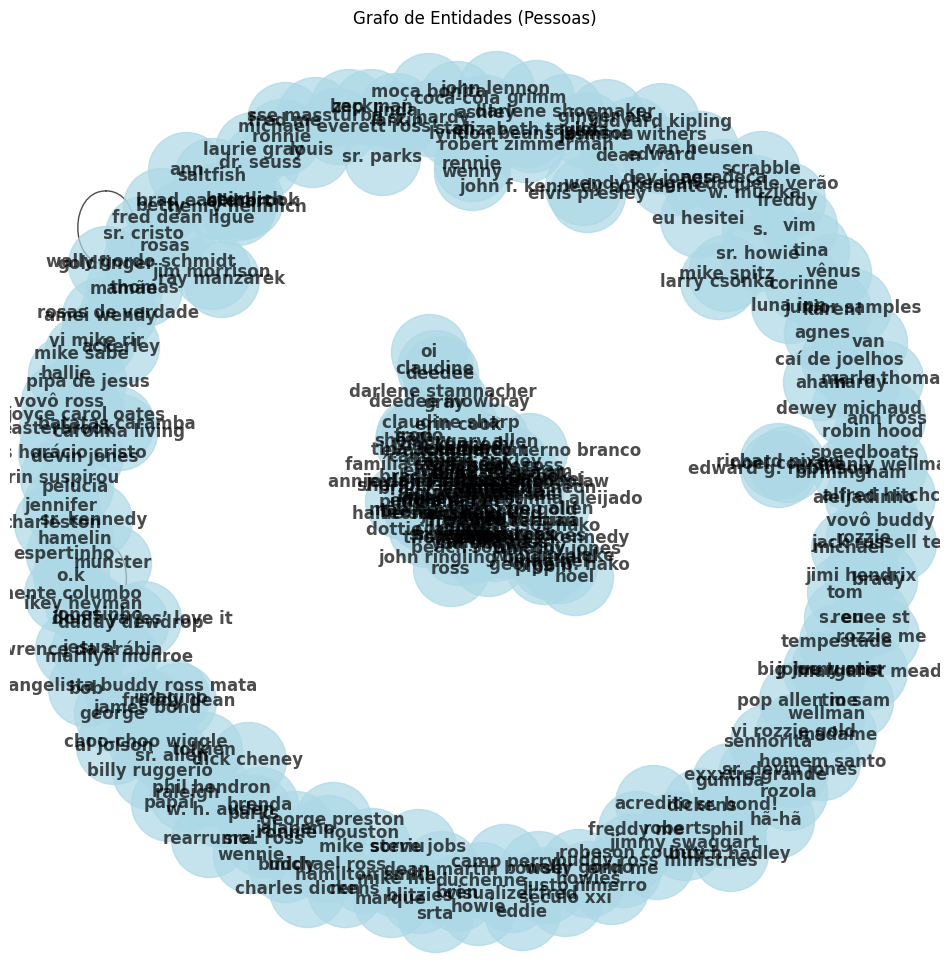


Métricas para o grafo de Entidades (Pessoas):
Número de nós: 293
Número de arestas: 158

Centralidade de grau (top 5):
mike: 0.0719
annie: 0.0616
erin: 0.0548
joyland: 0.0514
eddie parks: 0.0308

Coeficiente de agrupamento (top 5):
richard nixon: 1.0000
edward g. robinson: 1.0000
noel coward: 1.0000
sr. jones: 1.0000
gray: 1.0000

Hubs (nós com maior grau):
mike: 0.0719
annie: 0.0616
erin: 0.0548
joyland: 0.0514
eddie parks: 0.0308

Grau do Grafo (top 5):
mike: 21
annie: 18
erin: 16
joyland: 15
eddie parks: 9

Hubs por centralidade de intermediação:
mike: 0.0360
annie: 0.0304
erin: 0.0233
joyland: 0.0221
linda gray: 0.0203

Hubs por centralidade de proximidade:
mike: 0.1370
joyland: 0.1357
annie: 0.1357
erin: 0.1244
linda gray: 0.1238


([('mike', 21),
  ('annie', 18),
  ('erin', 16),
  ('joyland', 15),
  ('eddie parks', 9)],
 [('mike', 0.03604414397028437),
  ('annie', 0.03039112994627753),
  ('erin', 0.023310106260960656),
  ('joyland', 0.022071638707707043),
  ('linda gray', 0.020301103855686536)],
 [('mike', 0.1370028456091589),
  ('joyland', 0.13569181359376026),
  ('annie', 0.13569181359376026),
  ('erin', 0.1243841624609469),
  ('linda gray', 0.12384100017945804)],
 [('richard nixon', 1.0),
  ('edward g. robinson', 1.0),
  ('noel coward', 1.0),
  ('sr. jones', 1.0),
  ('gray', 1.0)])

In [25]:
# Criando os grafos para cada categoria (por exemplo, 'PER' para pessoas)
G1 = plot_entity_graphs_by_category(doc1, 'Pessoas', 'PER')
calcular_metricas(G1, 'Pessoas')

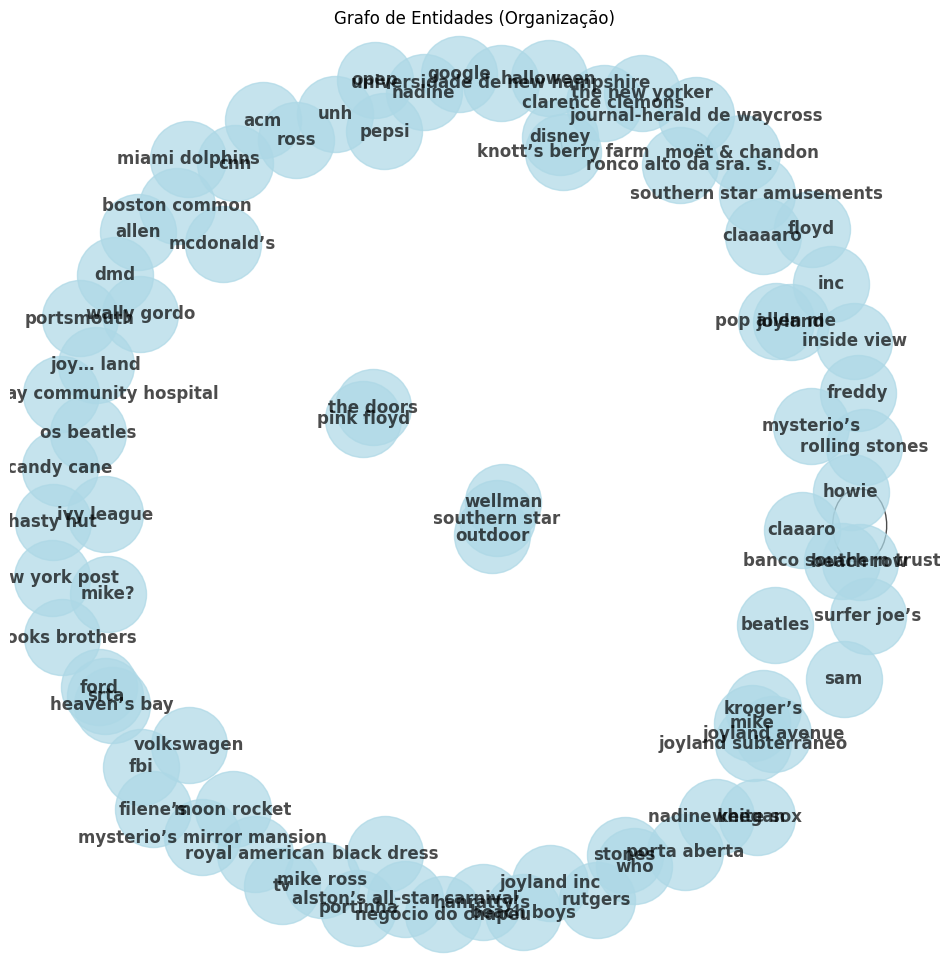


Métricas para o grafo de Entidades (Organização):
Número de nós: 83
Número de arestas: 12

Centralidade de grau (top 5):
mike: 0.0366
beach row: 0.0366
southern star: 0.0244
ford: 0.0122
disney: 0.0122

Coeficiente de agrupamento (top 5):
opep: 0.0000
ford: 0.0000
disney: 0.0000
beach boys: 0.0000
volkswagen: 0.0000

Hubs (nós com maior grau):
mike: 0.0366
beach row: 0.0366
southern star: 0.0244
ford: 0.0122
disney: 0.0122

Grau do Grafo (top 5):
mike: 3
beach row: 3
southern star: 2
ford: 1
disney: 1

Hubs por centralidade de intermediação:
mike: 0.0009
southern star: 0.0003
opep: 0.0000
ford: 0.0000
disney: 0.0000

Hubs por centralidade de proximidade:
mike: 0.0366
southern star: 0.0244
joyland avenue: 0.0220
joyland subterrâneo: 0.0220
kroger’s: 0.0220


([('mike', 3),
  ('beach row', 3),
  ('southern star', 2),
  ('ford', 1),
  ('disney', 1)],
 [('mike', 0.000903342366757001),
  ('southern star', 0.00030111412225233364),
  ('opep', 0.0),
  ('ford', 0.0),
  ('disney', 0.0)],
 [('mike', 0.036585365853658534),
  ('southern star', 0.024390243902439025),
  ('joyland avenue', 0.02195121951219512),
  ('joyland subterrâneo', 0.02195121951219512),
  ('kroger’s', 0.02195121951219512)],
 [('opep', 0),
  ('ford', 0),
  ('disney', 0),
  ('beach boys', 0),
  ('volkswagen', 0)])

In [26]:
# Criando os grafos para cada categoria (por exemplo, 'PER' para pessoas)
G12 = plot_entity_graphs_by_category(doc1, 'Organização', 'ORG')
calcular_metricas(G12, 'Organização')

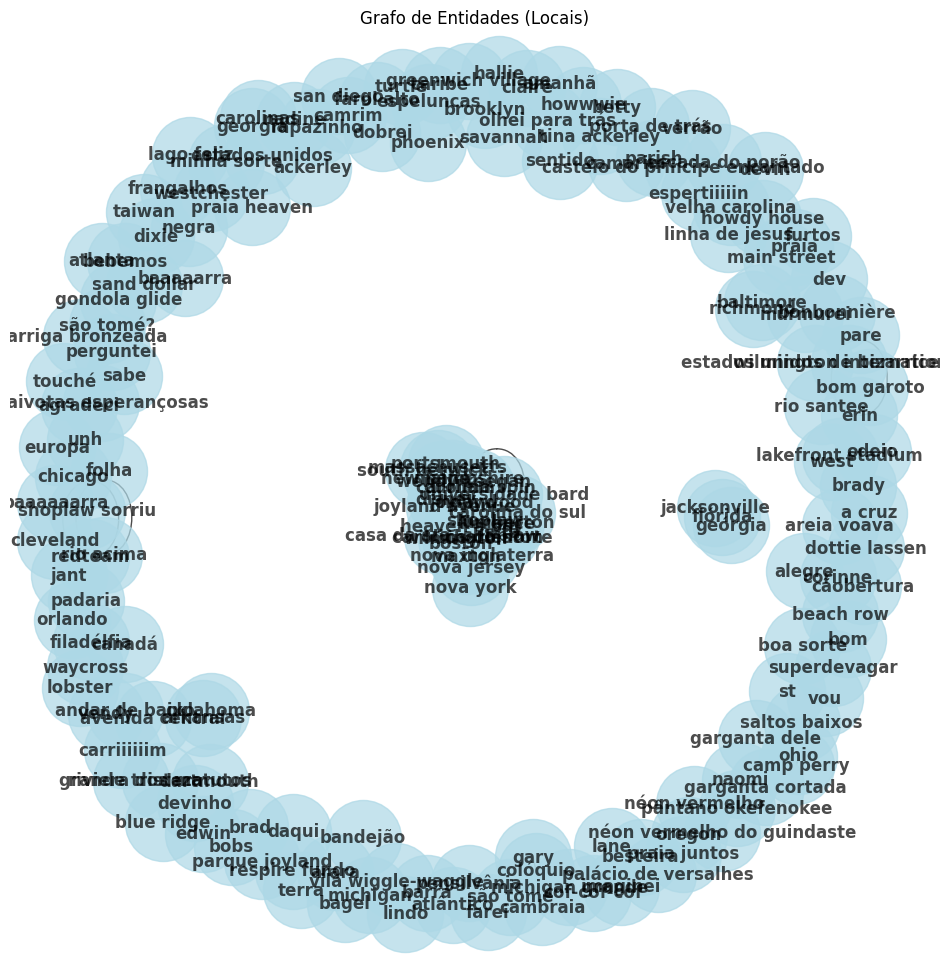


Métricas para o grafo de Entidades (Locais):
Número de nós: 182
Número de arestas: 54

Centralidade de grau (top 5):
joyland: 0.0608
carolina do norte: 0.0442
shoplaw: 0.0331
heaven’s bay: 0.0331
new hampshire: 0.0331

Coeficiente de agrupamento (top 5):
portsmouth: 1.0000
boston: 1.0000
wilmington: 1.0000
disney: 1.0000
joyland avenue: 1.0000

Hubs (nós com maior grau):
joyland: 0.0608
carolina do norte: 0.0442
shoplaw: 0.0331
heaven’s bay: 0.0331
new hampshire: 0.0331

Grau do Grafo (top 5):
joyland: 11
carolina do norte: 8
shoplaw: 6
heaven’s bay: 6
new hampshire: 6

Hubs por centralidade de intermediação:
joyland: 0.0140
carolina do norte: 0.0093
shoplaw: 0.0048
heaven’s bay: 0.0038
maine: 0.0029

Hubs por centralidade de proximidade:
joyland: 0.0895
carolina do norte: 0.0760
heaven’s bay: 0.0746
shoplaw: 0.0683
new hampshire: 0.0639


([('joyland', 11),
  ('carolina do norte', 8),
  ('shoplaw', 6),
  ('heaven’s bay', 6),
  ('new hampshire', 6)],
 [('joyland', 0.01397585430734602),
  ('carolina do norte', 0.009289952936361775),
  ('shoplaw', 0.004808676079394312),
  ('heaven’s bay', 0.0037855535093104156),
  ('maine', 0.002915899324739104)],
 [('joyland', 0.08950276243093923),
  ('carolina do norte', 0.07599291149796727),
  ('heaven’s bay', 0.07458563535911603),
  ('shoplaw', 0.06826481880325874),
  ('new hampshire', 0.06393054459352802)],
 [('portsmouth', 1.0),
  ('boston', 1.0),
  ('wilmington', 1.0),
  ('disney', 1.0),
  ('joyland avenue', 1.0)])

In [27]:
# Criando os grafos para cada categoria (por exemplo, 'PER' para pessoas)
G13 = plot_entity_graphs_by_category(doc1, 'Locais', 'LOC')
calcular_metricas(G13, 'Locais')

### Depois

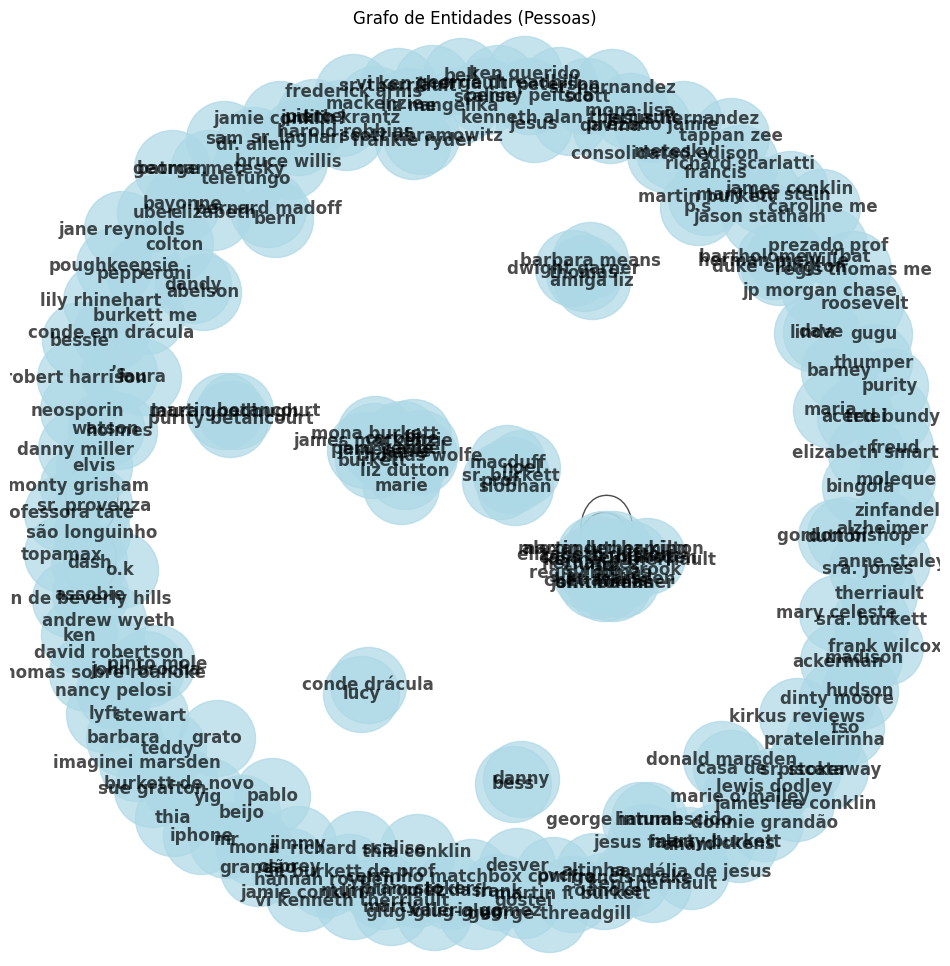


Métricas para o grafo de Entidades (Pessoas):
Número de nós: 218
Número de arestas: 57

Centralidade de grau (top 5):
liz: 0.0645
jamie: 0.0276
peru verde: 0.0230
sr. burkett: 0.0184
thomas: 0.0138

Coeficiente de agrupamento (top 5):
mona burkett: 1.0000
james mackenzie: 1.0000
thomas wolfe: 1.0000
angel: 1.0000
martin betancourt: 1.0000

Hubs (nós com maior grau):
liz: 0.0645
jamie: 0.0276
peru verde: 0.0230
sr. burkett: 0.0184
thomas: 0.0138

Grau do Grafo (top 5):
liz: 14
jamie: 6
peru verde: 5
sr. burkett: 4
thomas: 3

Hubs por centralidade de intermediação:
liz: 0.0033
jamie: 0.0018
peru verde: 0.0014
kenneth therriault: 0.0005
liz dutton: 0.0004

Hubs por centralidade de proximidade:
liz: 0.0556
jamie: 0.0349
kenneth therriault: 0.0325
peru verde: 0.0310
regis thomas: 0.0300


([('liz', 14),
  ('jamie', 6),
  ('peru verde', 5),
  ('sr. burkett', 4),
  ('thomas', 3)],
 [('liz', 0.0032855436081242534),
  ('jamie', 0.0018347840928486091),
  ('peru verde', 0.0014080901177675371),
  ('kenneth therriault', 0.0005120327700972862),
  ('liz dutton', 0.0004266939750810719)],
 [('liz', 0.055628703094140884),
  ('jamie', 0.034850230414746546),
  ('kenneth therriault', 0.03245007680491551),
  ('peru verde', 0.03097798259088582),
  ('regis thomas', 0.029953917050691243)],
 [('mona burkett', 1.0),
  ('james mackenzie', 1.0),
  ('thomas wolfe', 1.0),
  ('angel', 1.0),
  ('martin betancourt', 1.0)])

In [28]:
# Criando os grafos para cada categoria (por exemplo, 'PER' para pessoas)
G2 = plot_entity_graphs_by_category(doc2, 'Pessoas', 'PER')
calcular_metricas(G2, 'Pessoas')

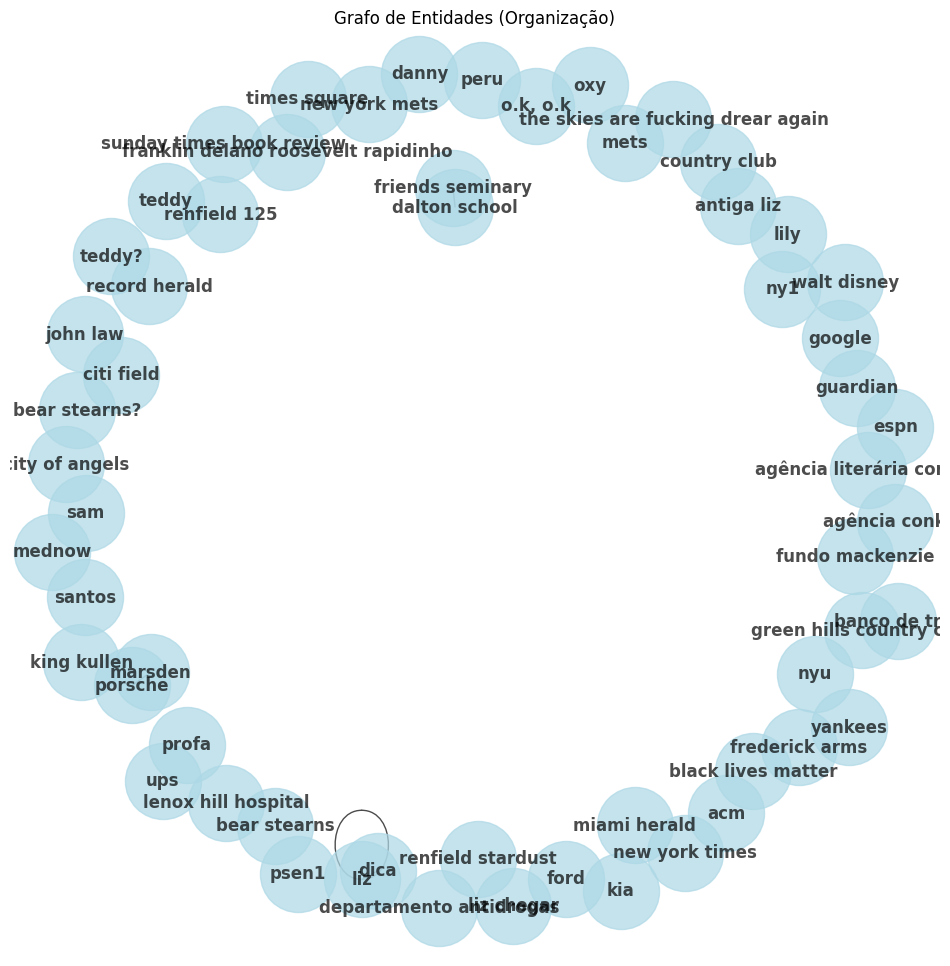


Métricas para o grafo de Entidades (Organização):
Número de nós: 58
Número de arestas: 4

Centralidade de grau (top 5):
liz: 0.0526
dica: 0.0175
dalton school: 0.0175
friends seminary: 0.0175
marsden: 0.0175

Coeficiente de agrupamento (top 5):
peru: 0.0000
lily: 0.0000
agência literária conklin: 0.0000
fundo mackenzie: 0.0000
agência conklin: 0.0000

Hubs (nós com maior grau):
liz: 0.0526
dica: 0.0175
dalton school: 0.0175
friends seminary: 0.0175
marsden: 0.0175

Grau do Grafo (top 5):
liz: 3
dica: 1
dalton school: 1
friends seminary: 1
marsden: 1

Hubs por centralidade de intermediação:
peru: 0.0000
lily: 0.0000
agência literária conklin: 0.0000
fundo mackenzie: 0.0000
agência conklin: 0.0000

Hubs por centralidade de proximidade:
liz: 0.0175
dica: 0.0175
dalton school: 0.0175
friends seminary: 0.0175
marsden: 0.0175


([('liz', 3),
  ('dica', 1),
  ('dalton school', 1),
  ('friends seminary', 1),
  ('marsden', 1)],
 [('peru', 0.0),
  ('lily', 0.0),
  ('agência literária conklin', 0.0),
  ('fundo mackenzie', 0.0),
  ('agência conklin', 0.0)],
 [('liz', 0.017543859649122806),
  ('dica', 0.017543859649122806),
  ('dalton school', 0.017543859649122806),
  ('friends seminary', 0.017543859649122806),
  ('marsden', 0.017543859649122806)],
 [('peru', 0),
  ('lily', 0),
  ('agência literária conklin', 0),
  ('fundo mackenzie', 0),
  ('agência conklin', 0)])

In [29]:
# Criando os grafos para cada categoria (por exemplo, 'PER' para pessoas)
G22 = plot_entity_graphs_by_category(doc2, 'Organização', 'ORG')
calcular_metricas(G22, 'Organização')

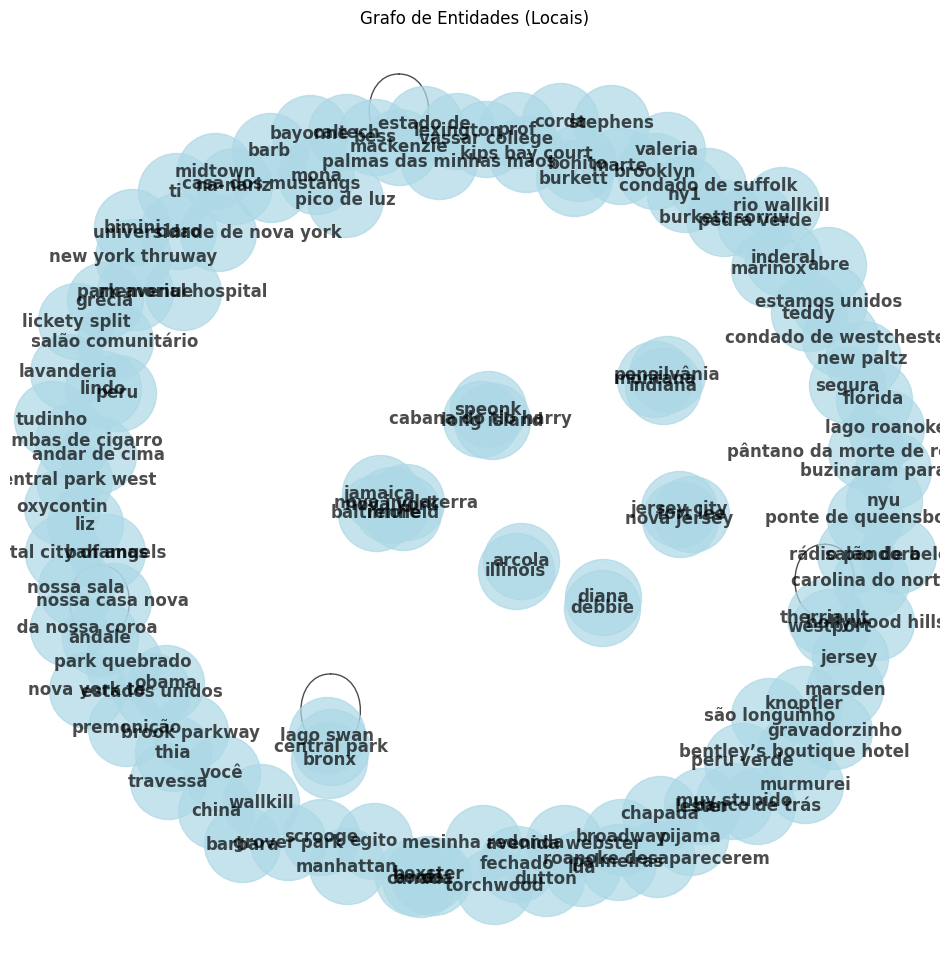


Métricas para o grafo de Entidades (Locais):
Número de nós: 136
Número de arestas: 28

Centralidade de grau (top 5):
central park: 0.0296
nova york: 0.0296
therriault: 0.0222
speonk: 0.0148
mackenzie: 0.0148

Coeficiente de agrupamento (top 5):
speonk: 1.0000
long island: 1.0000
cabana do tio harry: 1.0000
nova jersey: 1.0000
jersey city: 1.0000

Hubs (nós com maior grau):
central park: 0.0296
nova york: 0.0296
therriault: 0.0222
speonk: 0.0148
mackenzie: 0.0148

Grau do Grafo (top 5):
central park: 4
nova york: 4
therriault: 3
speonk: 2
mackenzie: 2

Hubs por centralidade de intermediação:
nova york: 0.0006
central park: 0.0001
peru: 0.0000
burkett: 0.0000
universidade de nova york: 0.0000

Hubs por centralidade de proximidade:
nova york: 0.0296
renfield: 0.0198
nova inglaterra: 0.0198
jamaica: 0.0169
baltimore: 0.0169


([('central park', 4),
  ('nova york', 4),
  ('therriault', 3),
  ('speonk', 2),
  ('mackenzie', 2)],
 [('nova york', 0.000552791597567717),
  ('central park', 0.0001105583195135434),
  ('peru', 0.0),
  ('burkett', 0.0),
  ('universidade de nova york', 0.0)],
 [('nova york', 0.02962962962962963),
  ('renfield', 0.019753086419753086),
  ('nova inglaterra', 0.019753086419753086),
  ('jamaica', 0.016931216931216932),
  ('baltimore', 0.016931216931216932)],
 [('speonk', 1.0),
  ('long island', 1.0),
  ('cabana do tio harry', 1.0),
  ('nova jersey', 1.0),
  ('jersey city', 1.0)])

In [30]:
# Criando os grafos para cada categoria (por exemplo, 'PER' para pessoas)
G23 = plot_entity_graphs_by_category(doc2, 'Locais', 'LOC')
calcular_metricas(G23, 'Locais')

## Criação do ego

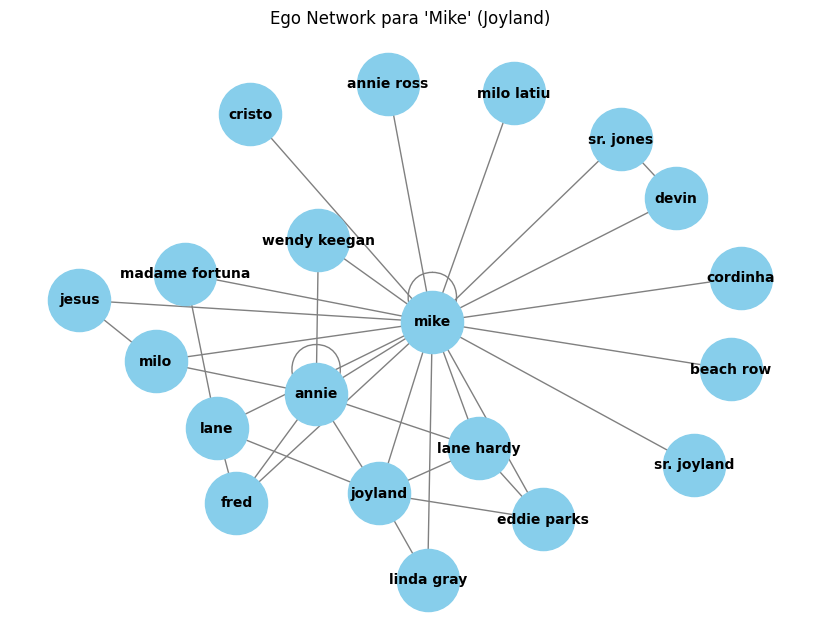

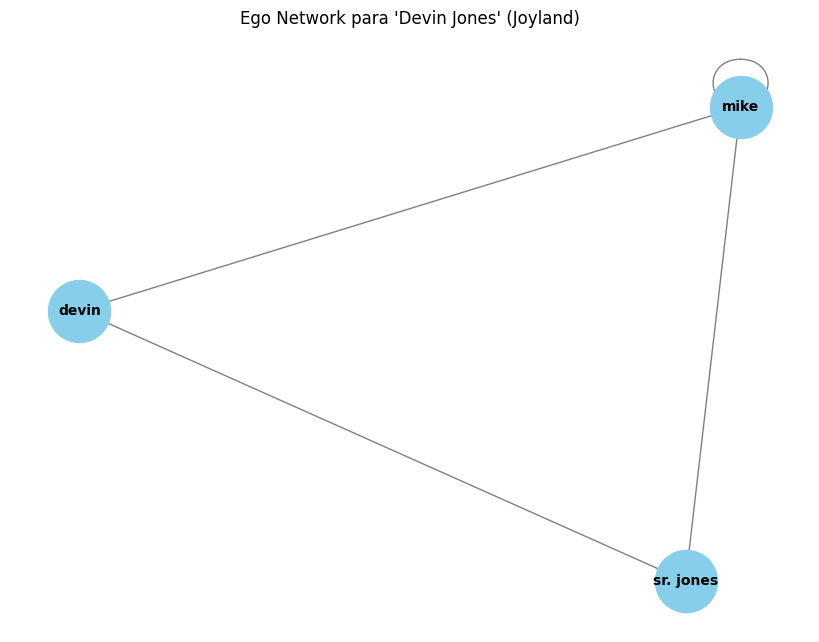

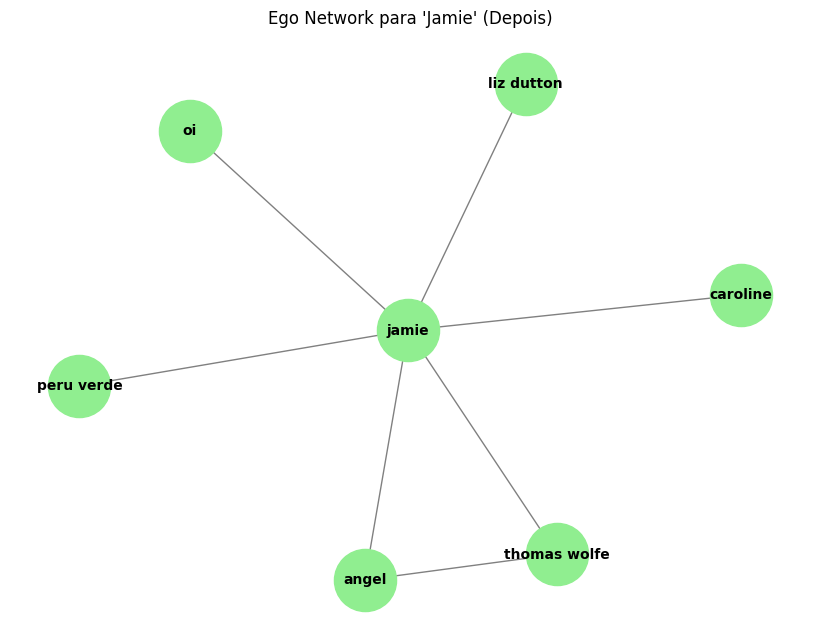

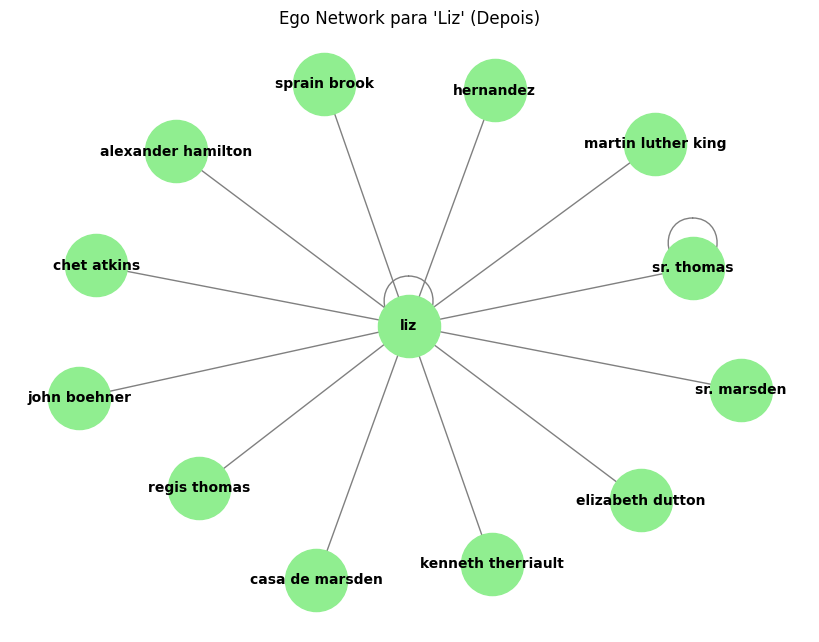

In [34]:
# Função para construir o grafo da ego network
def criar_ego_network(G, entidade):
    if entidade in G:
        # Cria um subgrafo apenas com o nó 'entidade' e seus vizinhos
        ego_network = G.subgraph([entidade] + list(G.neighbors(entidade)))
        return ego_network
    else:
        return None

# Criar o Ego Network para a entidade
ego_network1 = criar_ego_network(G1, 'mike')
ego_network12 = criar_ego_network(G1, 'sr. jones')
ego_network2 = criar_ego_network(G2, 'jamie')
ego_network22 = criar_ego_network(G2, 'liz')

# Visualizar o grafo do Ego Network para o Livro 1
if ego_network1:
    plt.figure(figsize=(8, 6))
    nx.draw(ego_network1, with_labels=True, node_color='skyblue', font_size=10, font_weight='bold', node_size=2000, edge_color='gray')
    plt.title("Ego Network para 'Mike' (Joyland)")
    plt.show()
else:
    print("Entidade 'Mike' não encontrada no Grafo 1.")

if ego_network12:
    plt.figure(figsize=(8, 6))
    nx.draw(ego_network12, with_labels=True, node_color='skyblue', font_size=10, font_weight='bold', node_size=2000, edge_color='gray')
    plt.title("Ego Network para 'Devin Jones' (Joyland)")
    plt.show()
else:
    print("Entidade 'Devin Jones' não encontrada no Grafo 1.")


# Visualizar o grafo do Ego Network para o Livro 2
if ego_network2:
    plt.figure(figsize=(8, 6))
    nx.draw(ego_network2, with_labels=True, node_color='lightgreen', font_size=10, font_weight='bold', node_size=2000, edge_color='gray')
    plt.title("Ego Network para 'Jamie' (Depois)")
    plt.show()
else:
    print("Entidade 'Jamie' não encontrada no Grafo 2.")

# Visualizar o grafo do Ego Network para o Livro 2
if ego_network22:
    plt.figure(figsize=(8, 6))
    nx.draw(ego_network22, with_labels=True, node_color='lightgreen', font_size=10, font_weight='bold', node_size=2000, edge_color='gray')
    plt.title("Ego Network para 'Liz' (Depois)")
    plt.show()
else:
    print("Entidade 'Liz' não encontrada no Grafo 2.")

# Redes

In [35]:
# Função para construir o grafo com base em PROPN (substantivos próprios)
def build_propn_graph(doc):
    G = nx.Graph()  # Grafo não direcionado

    # Identificar todos os tokens PROPN (substantivos próprios)
    for token in doc:
        if token.pos_ == "PER" and token.text.istitle():  # Verifica se o token é PROPN e está capitalizado
            G.add_node(token.text, label="PER")

    # Adicionar arestas (relações) entre as entidades na mesma sentença
    for sent in doc.sents:  # Para cada sentença do documento
        propn_in_sentence = [token.text for token in sent if token.pos_ == "PER" and token.text.istitle()]
        # Conectar as entidades entre si (relacionando PROPNs dentro da mesma sentença)
        for i in range(len(propn_in_sentence)):
            for j in range(i + 1, len(propn_in_sentence)):
                G.add_edge(propn_in_sentence[i], propn_in_sentence[j])

    return G

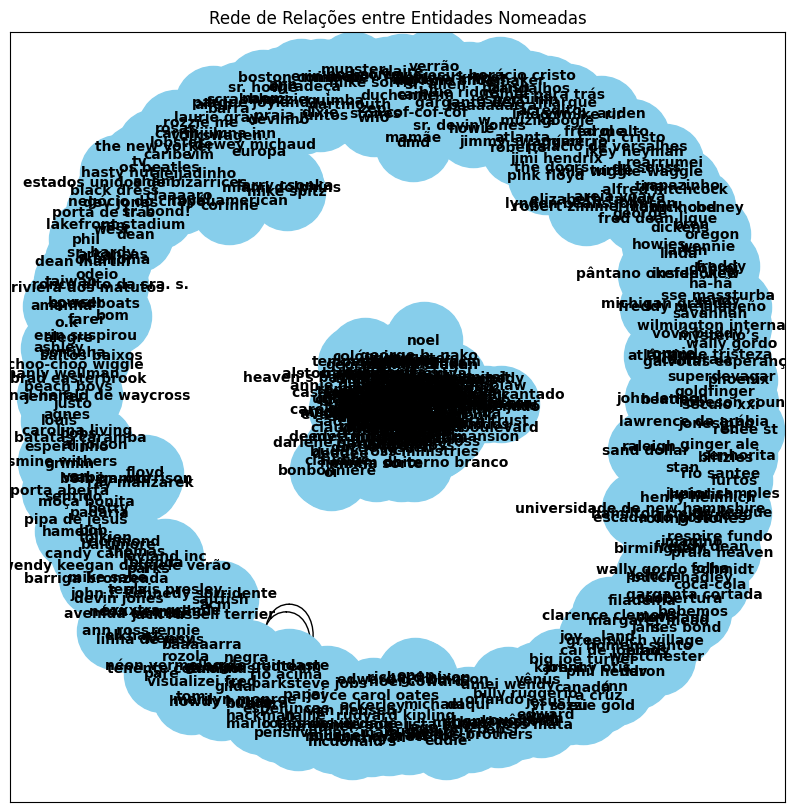

In [36]:
# Criar um grafo direcionado
G3 = nx.Graph()

# Extrair as entidades nomeadas do texto
entities = [ent.text for ent in doc1.ents if ent.label_ in ['PER', 'ORG', 'GPE', 'LOC']]

# Adicionar as entidades como nós no grafo
G3.add_nodes_from(entities)

# Criar relações entre entidades que aparecem próximas (exemplo: na mesma sentença)
for sent in doc1.sents:
    # Extrair entidades na sentença
    ents_in_sent = [ent.text for ent in sent.ents if ent.label_ in ['PER', 'ORG', 'GPE', 'LOC']]
    # Adicionar arestas entre as entidades que aparecem na mesma sentença
    for i in range(len(ents_in_sent)):
        for j in range(i + 1, len(ents_in_sent)):
            G3.add_edge(ents_in_sent[i], ents_in_sent[j])

# Visualizando a rede
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
nx.draw_networkx(G3, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold')
plt.title("Rede de Relações entre Entidades Nomeadas")
plt.show()

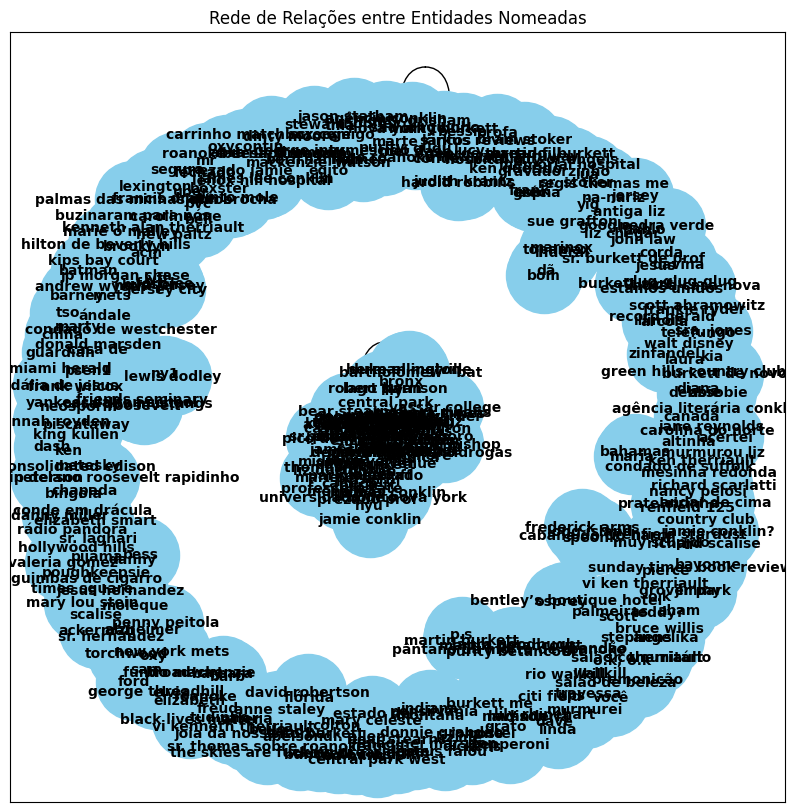

In [37]:
# Criar um grafo direcionado
G4 = nx.Graph()

# Extrair as entidades nomeadas do texto
entities = [ent.text for ent in doc2.ents if ent.label_ in ['PER', 'ORG', 'GPE', 'LOC']]

# Adicionar as entidades como nós no grafo
G4.add_nodes_from(entities)

# Criar relações entre entidades que aparecem próximas (exemplo: na mesma sentença)
for sent in doc2.sents:
    # Extrair entidades na sentença
    ents_in_sent = [ent.text for ent in sent.ents if ent.label_ in ['PER', 'ORG', 'GPE', 'LOC']]
    # Adicionar arestas entre as entidades que aparecem na mesma sentença
    for i in range(len(ents_in_sent)):
        for j in range(i + 1, len(ents_in_sent)):
            G4.add_edge(ents_in_sent[i], ents_in_sent[j])

# Visualizando a rede
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
nx.draw_networkx(G4, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold')
plt.title("Rede de Relações entre Entidades Nomeadas")
plt.show()

# Exportação

In [38]:
# Função para exportar o grafo para o formato GraphML
def exportar_grafo_para_gephi(G, nome_arquivo):
    # Exportando o grafo para GraphML
    nx.write_graphml(G, nome_arquivo)
    print(f"Grafo exportado para {nome_arquivo}")

In [39]:
# Exportando o grafo para Joyland
exportar_grafo_para_gephi(G1, "grafo_joyland_per.graphml")
exportar_grafo_para_gephi(G12, "grafo_joyland_org.graphml")
exportar_grafo_para_gephi(G13, "grafo_joyland_loc.graphml")

# Exportando o grafo para Depois
exportar_grafo_para_gephi(G2, "grafo_depois_par.graphml")
exportar_grafo_para_gephi(G22, "grafo_depois_org.graphml")
exportar_grafo_para_gephi(G23, "grafo_depois_loc.graphml")

# Exportando o grafo para o ego
exportar_grafo_para_gephi(ego_network1, "ego_joyland_mike.graphml")
exportar_grafo_para_gephi(ego_network12, "ego_joyland_dev.graphml")
exportar_grafo_para_gephi(ego_network2, "ego_depois_jamie.graphml")
exportar_grafo_para_gephi(ego_network22, "ego_depois_liz.graphml")

# Exportando o grafo para a rede
exportar_grafo_para_gephi(G3, "grafo_joyland.graphml")
exportar_grafo_para_gephi(G4, "grafo_depois.graphml")

Grafo exportado para grafo_joyland_per.graphml
Grafo exportado para grafo_joyland_org.graphml
Grafo exportado para grafo_joyland_loc.graphml
Grafo exportado para grafo_depois_par.graphml
Grafo exportado para grafo_depois_org.graphml
Grafo exportado para grafo_depois_loc.graphml
Grafo exportado para ego_joyland_mike.graphml
Grafo exportado para ego_joyland_dev.graphml
Grafo exportado para ego_depois_jamie.graphml
Grafo exportado para ego_depois_liz.graphml
Grafo exportado para grafo_joyland.graphml
Grafo exportado para grafo_depois.graphml
